In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.testing import SeqIndTester
import matplotlib
from tqdm import tqdm

In [ ]:
changes_detected = []
sample_size = 1000
cur_beta = 0.5 * np.ones([sample_size, 1])
cur_beta[:200, 0] = 0
for _ in tqdm(range(100)):
    # generate sphere data
    X = np.random.normal(size=[sample_size, 1])
    eps = np.random.normal(size=[sample_size, 1])
    Y = cur_beta * (np.sin(X) + X ** 2) + eps
    # initialize tester with hsic payoff
    tester = SeqIndTester()
    tester.significance_level = 0.001
    tester.payoff_style = 'hsic'
    # choose the rule for selecting betting fractions: 'mixing', 'aGRAPA' or 'ONS'
    tester.lmbd_type = 'ONS'
    # for ONS use truncation level 0.5, for aGRAPA 0.9
    tester.truncation_level = 0.5
    # process pairs and keep track of the wealth
    for cur_pair in range(1, (sample_size // 2)-1):
        tester.process_pair(X[2 * cur_pair: 2 * (cur_pair + 1)], Y[2 * cur_pair: 2 * (cur_pair + 1)],
                            X[:2 * cur_pair], Y[:2 * cur_pair])
        if tester.null_rejected:
            changes_detected.append(cur_pair)
            break

100%|██████████| 100/100 [00:26<00:00,  3.79it/s]


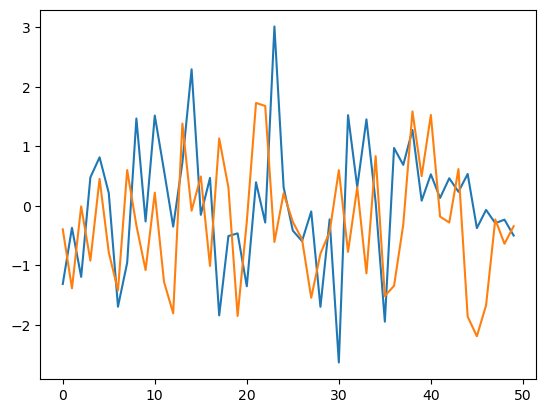

In [3]:
plt.plot(X[:50])
plt.plot(Y[:50])

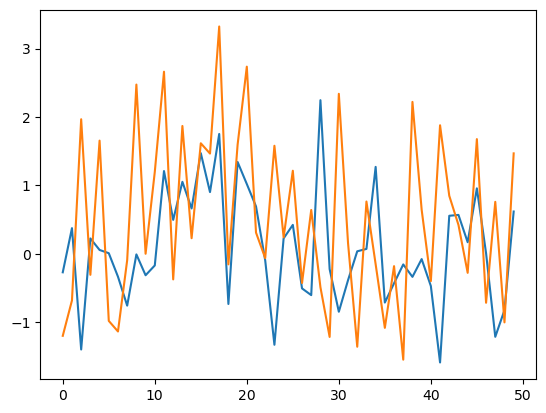

In [4]:
plt.plot(X[300:350])
plt.plot(Y[300:350])

(array([ 3.,  7., 13., 13., 26., 18., 10.,  7.,  1.,  2.]),
 array([252. , 271.8, 291.6, 311.4, 331.2, 351. , 370.8, 390.6, 410.4,
        430.2, 450. ]),
 <BarContainer object of 10 artists>)

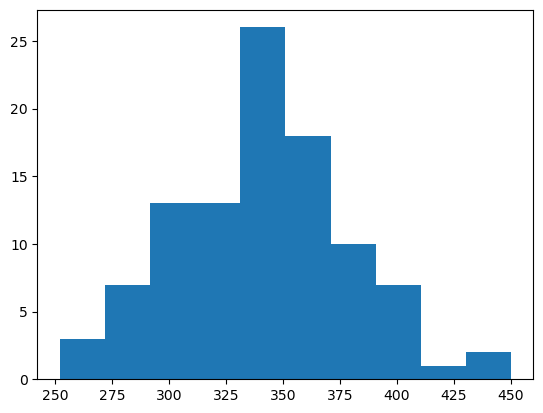

In [5]:
plt.hist(changes_detected)

357

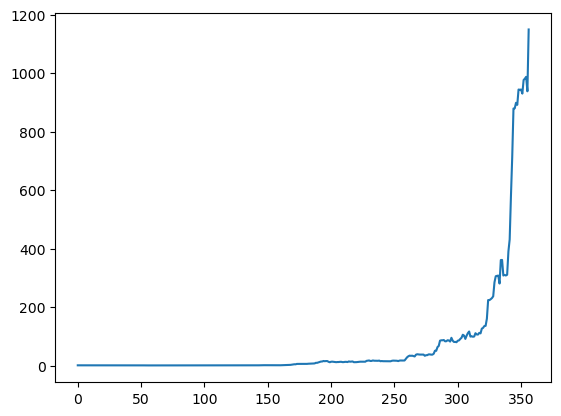

In [17]:
wealth = []
# generate sphere data
X = np.random.normal(size=[sample_size, 1])
eps = np.random.normal(size=[sample_size, 1])
Y = cur_beta * (np.sin(X) + X ** 2) + eps
# initialize tester with hsic payoff
tester = SeqIndTester()
tester.significance_level = 0.001
tester.payoff_style = 'hsic'
# choose the rule for selecting betting fractions: 'mixing', 'aGRAPA' or 'ONS'
tester.lmbd_type = 'ONS'
# for ONS use truncation level 0.5, for aGRAPA 0.9
tester.truncation_level = 0.5
# process pairs and keep track of the wealth
for cur_pair in range(1, (sample_size // 2)-1):
    tester.process_pair(X[2 * cur_pair: 2 * (cur_pair + 1)], Y[2 * cur_pair: 2 * (cur_pair + 1)],
                        X[:2 * cur_pair], Y[:2 * cur_pair])
    wealth.append(tester.wealth)
    if tester.null_rejected:
        changes_detected.append(cur_pair)
        break


plt.plot(wealth[:400])
changes_detected[-1]